In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
df = pd.read_csv("songs.csv")  # Make sure this CSV is in the same folder

# Quick preview
df.head()


,Title,Album,Lyrics
0,22 (Taylor’s Version),Red (Taylor’s Version),It feels like a perfect night\nTo dress up lik...
1,All Too Well (10 Minute Version) (Taylor’s Ver...,Red (Taylor’s Version),"I walked through the door with you, the air wa..."
2,All Too Well (Taylor’s Version),Red (Taylor’s Version),"I walked through the door with you, the air wa..."
3,Babe (Taylor’s Version) [From The Vault],Red (Taylor’s Version),"What about your promises, promises?\nWhat abou..."
4,Begin Again (Taylor’s Version),Red (Taylor’s Version),Took a deep breath in the mirror\nHe didn't li...


In [3]:
# Clean lyrics text
df['Lyrics'] = df['Lyrics'].astype(str).str.strip()
df.dropna(subset=['Lyrics'], inplace=True)


In [4]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply to each lyric
df[['Polarity', 'Subjectivity']] = df['Lyrics'].apply(lambda x: pd.Series(get_sentiment(x)))


In [5]:
album_sentiment = df.groupby('Album')[['Polarity', 'Subjectivity']].mean().reset_index()
album_sentiment = album_sentiment.sort_values(by='Polarity', ascending=False)


/var/folders/yw/7tv7g4t974s2pzd75_30cq3h0000gn/T/ipykernel_11599/4131813850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=album_sentiment, x='Polarity', y='Album', palette='coolwarm')


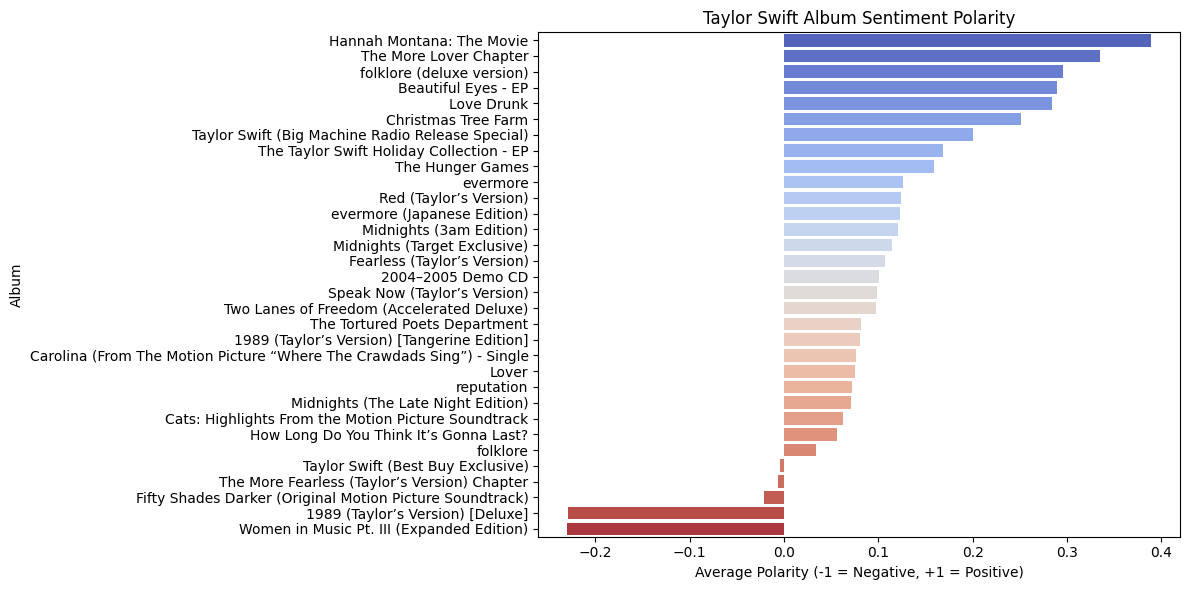

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=album_sentiment, x='Polarity', y='Album', palette='coolwarm')
plt.title('Taylor Swift Album Sentiment Polarity')
plt.xlabel('Average Polarity (-1 = Negative, +1 = Positive)')
plt.ylabel('Album')
plt.tight_layout()
plt.show()


/var/folders/yw/7tv7g4t974s2pzd75_30cq3h0000gn/T/ipykernel_11599/1133831552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=album_sentiment, x='Subjectivity', y='Album', palette='magma')


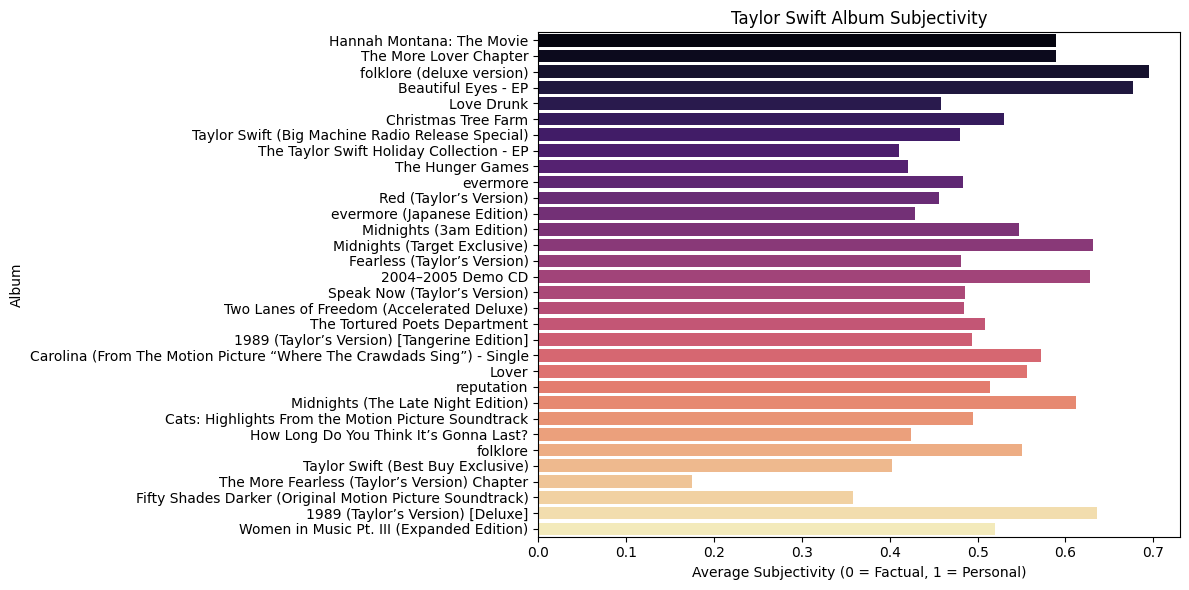

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=album_sentiment, x='Subjectivity', y='Album', palette='magma')
plt.title('Taylor Swift Album Subjectivity')
plt.xlabel('Average Subjectivity (0 = Factual, 1 = Personal)')
plt.ylabel('Album')
plt.tight_layout()
plt.show()
